<a href="https://colab.research.google.com/github/jscorrea16/Pandas/blob/main/Activity_10_Joshua_Correa_CIDM_5310.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Activity 10
# Importing Libraries

import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Load the stocks.csv file and store it in a DataFrame
# called my_data. Use the .head() method to display
# the first five rows:

my_data = pd.read_csv('/content/drive/MyDrive/Dataset/stocks.csv')

my_data.head(5)

,Date,Close,Volume,symbol,sentiment
0,2017-04-17,20636.919922,229240000,S1,NEUTRAL
1,2017-04-17,20.000000,88300,S2,NEUTRAL
2,2017-04-17,5400.000000,0,S3,NEUTRAL
3,2017-04-18,20523.279297,263180000,S1,NEUTRAL
4,2017-04-18,20.150000,60500,S2,NEUTRAL


In [3]:
# Inspect .dtypes and convert the dates
# to pandas datetime if needed:

my_data.dtypes

Date          object
Close        float64
Volume         int64
symbol        object
sentiment     object
dtype: object

In [4]:
# Since the date is of the object type
# (as it was read as a string), use
# pd.to_datetime() to convert it to
# datetime, and use .describe() to
# inspcect the result:

my_data['Date'] = \
pd.to_datetime(my_data['Date'])

my_data['Date'].describe()

<ipython-input-4-19290890da14>:10: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  my_data['Date'].describe()


count                     753
unique                    251
top       2017-04-17 00:00:00
freq                        3
first     2017-04-17 00:00:00
last      2018-04-13 00:00:00
Name: Date, dtype: object

In [5]:
# Split the data into train and test based on the date,
# keeping the last 3 months as the test set.

train_end = '2018-01-13'

train = my_data.loc[my_data['Date'] <=
                    train_end,:]

test = my_data.loc[my_data['Date'] >
                   train_end,:]

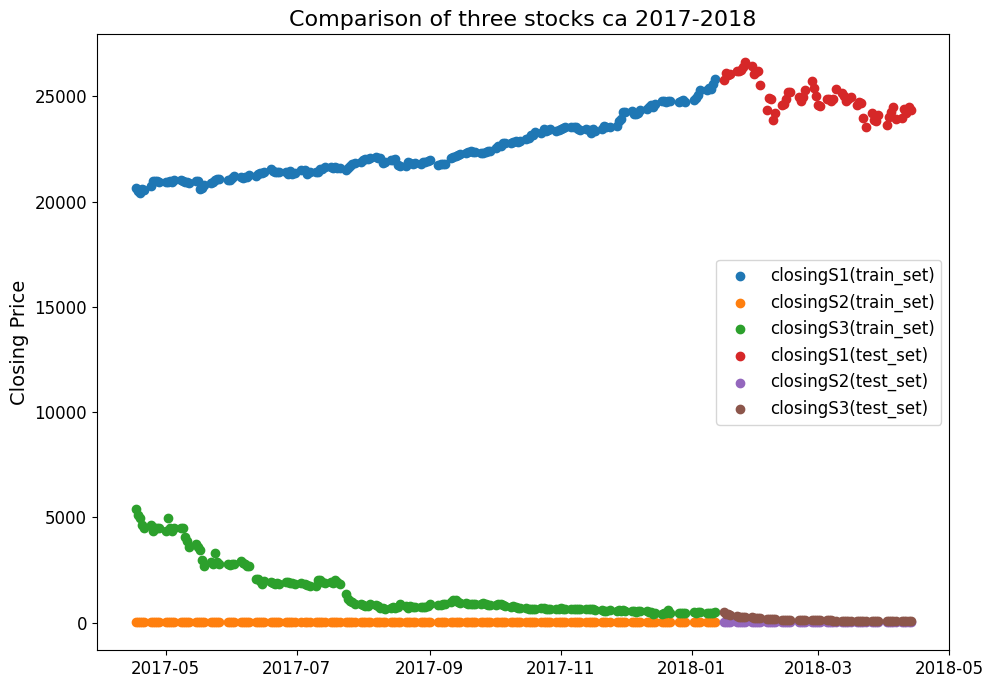

In [8]:
# Generate a scatter plot that shows the prices over time
# of different stock symbols and identifies the train and
# test splits.

figure, ax = plt.subplots(figsize = (11, 8))

symbols_train = train.groupby('symbol')

symbols_test = test.groupby('symbol')

for train_name, symbol_train in symbols_train:

  ax.scatter(symbol_train.Date,
    symbol_train.Close,
    label = 'closing' + train_name + '(train_set)')

for test_name, symbol_test in symbols_test:
  ax.scatter(symbol_test.Date,
             symbol_test.Close,
             label = 'closing' + test_name + '(test_set)')

ax.legend(fontsize = 12)
ax.set_ylabel('Closing Price', fontsize = 14)
ax.tick_params(labelsize = 12)
ax.set_title('Comparison of three stocks ca 2017-2018',
             fontsize = 16)
plt.show()

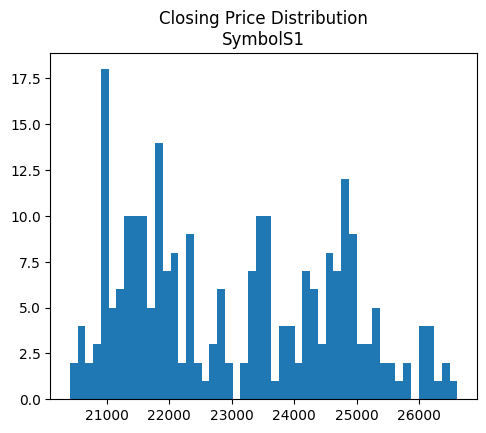

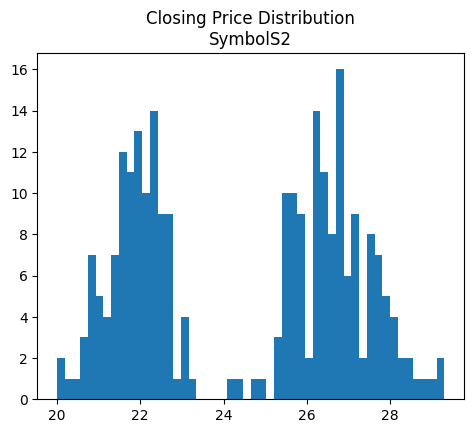

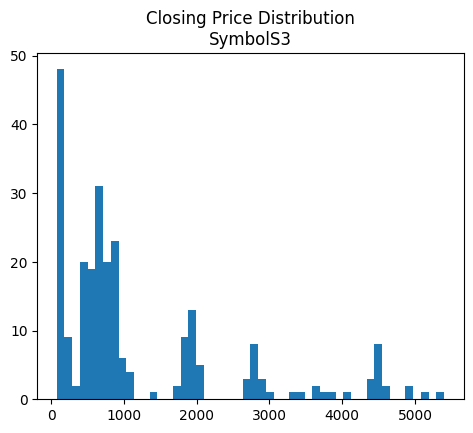

In [9]:
# The intitial scatter plot isn't very informative
# because the different symbols have very different pricing...
# Plot a histogram of the prize distribution for each symbol
# separately, and use enough bins to see the detail (in this
# case, we've used 50):

symbols = my_data.symbol.unique()
for i in range(len(symbols)):
  fig, ax = plt.subplots(figsize = (5.5, 4.5))
  ax.hist(my_data.groupby('symbol').get_group(symbols[i])['Close'],
          bins = 50)
  ax.set_title('Closing Price Distribution\nSymbol' + symbols[i])
  plt.show()

In [12]:
# Use sklearn to scale the original price and volume
# data by symbol, storing each symbol as a new DataFrame
# in a list, with the scalers as another list:

scale_cols = ['Close', 'Volume']
scalers = []
scaled_data = []
for this_symbol in range(len(symbols)):
#
# scale the raw data by symbol
#
    scalers.append(StandardScaler())
    (scaled_data.append(my_data.groupby('symbol').
                        get_group(symbols[this_symbol]).copy()))
    scaled_data[this_symbol].loc[:, scale_cols] = \
        (scalers[this_symbol].
         fit_transform(scaled_data[this_symbol].loc[:, scale_cols]))
[data.head() for data in scaled_data]

[         Date     Close    Volume symbol sentiment
 0  2017-04-17 -1.469506 -1.175399     S1   NEUTRAL
 3  2017-04-18 -1.538998 -0.840327     S1   NEUTRAL
 6  2017-04-19 -1.611638 -0.528257     S1   NEUTRAL
 9  2017-04-20 -1.505101 -0.354008     S1       POS
 14 2017-04-21 -1.524028  0.210303     S1   NEUTRAL,
          Date     Close    Volume symbol sentiment
 1  2017-04-17 -1.757829  0.198494     S2   NEUTRAL
 4  2017-04-18 -1.699092 -0.359611     S2   NEUTRAL
 7  2017-04-19 -1.640355  0.351069     S2   NEUTRAL
 10 2017-04-20 -1.424984 -0.443929     S2       POS
 12 2017-04-21 -1.483721 -0.259233     S2   NEUTRAL,
          Date     Close    Volume symbol sentiment
 2  2017-04-17  3.342186 -0.211226     S3   NEUTRAL
 5  2017-04-18  3.104449 -0.211226     S3   NEUTRAL
 8  2017-04-19  2.985580 -0.211226     S3   NEUTRAL
 11 2017-04-20  2.747843 -0.211226     S3       NEG
 13 2017-04-21  2.628974 -0.211226     S3   NEUTRAL]

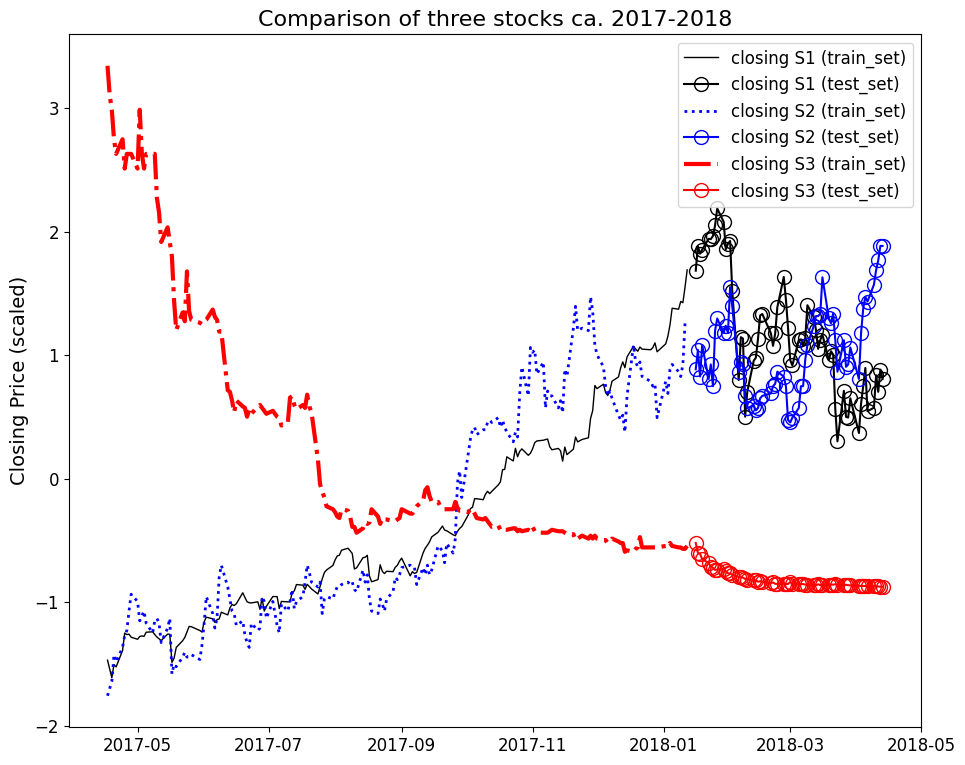

In [13]:
# Plot the training/test data as before, using a loop
# over the symbols.

linestyles = ['solid', 'dotted', 'dashdot']
colors = ['black', 'blue', 'red']
figure, ax = plt.subplots(figsize = (11, 9))
for this_symbol in range(len(symbols)):
#
# split the data
#
    train = (scaled_data[this_symbol].
             loc[scaled_data[this_symbol]['Date'] <= train_end, :])
    test = (scaled_data[this_symbol].
            loc[scaled_data[this_symbol]['Date'] > train_end, :])
#
# generate the plots
#
    ax.plot(train.Date, train.Close,
            linestyle = linestyles[this_symbol], lw = this_symbol + 1,
            color = colors[this_symbol],
            label = 'closing ' + symbols[this_symbol] + ' (train_set)')
    ax.plot(test.Date, test.Close, 'o-',
            fillstyle = 'none', markersize = 10,
            color = colors[this_symbol],
            label = 'closing ' + symbols[this_symbol] + ' (test_set)')
ax.legend(fontsize = 12)
ax.set_ylabel('Closing Price (scaled)', fontsize = 14)
ax.tick_params(labelsize = 12)
ax.set_title('Comparison of three stocks ca. 2017-2018',
             fontsize = 16)
plt.show()

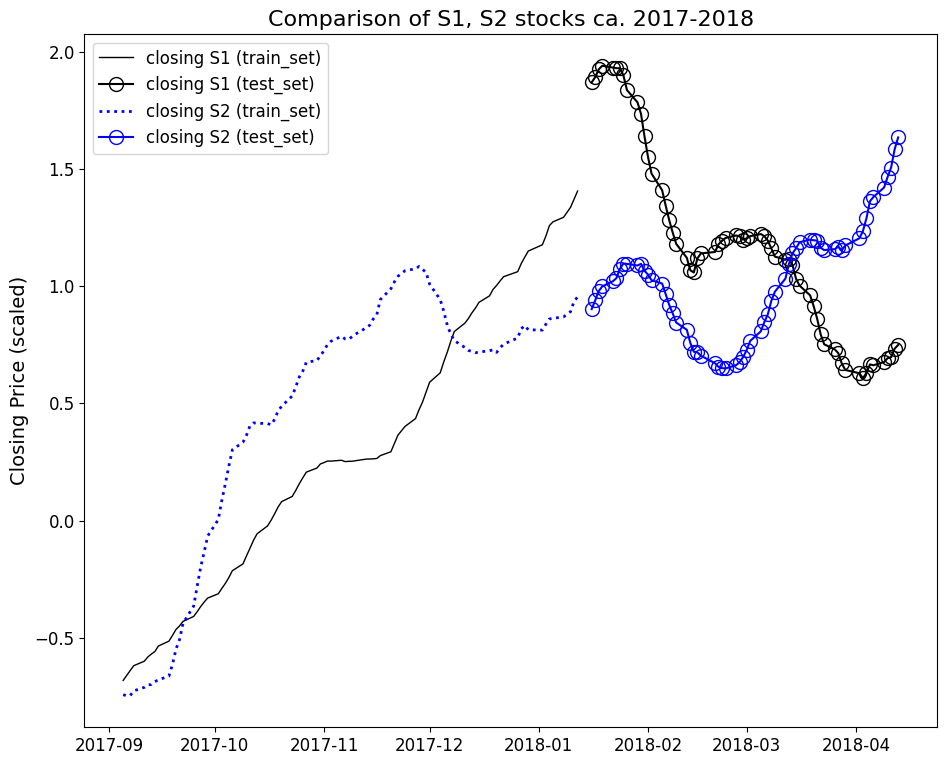

In [14]:
# Apply a smoothing of 14 days and compare
# whether the two stocks are behaving the same way
# over the period from 2017-2019 onward.

start_date = '2017-09-01'
fig, ax = plt.subplots(figsize = (11, 9))
for this_symbol in [0, 1]:
    train = \
      (scaled_data[this_symbol].copy().
       loc[scaled_data[this_symbol]['Date'] <= train_end, :])
    train = train.loc[train['Date'] > start_date, :]
    train.Close = train.Close.rolling(window = 14,
                                      min_periods = 0,
                                      center = True).mean()
    test = \
      (scaled_data[this_symbol].copy().
       loc[scaled_data[this_symbol]['Date'] > train_end, :])
    test = test.loc[test['Date'] > start_date, :]
    test.Close = test.Close.rolling(window = 14,
                                    min_periods = 0,
                                    center = True).mean()
    ax.plot(train.Date, train.Close,
            linestyle = linestyles[this_symbol], lw = this_symbol + 1,
            c = colors[this_symbol],
            label = 'closing ' + symbols[this_symbol] + ' (train_set)')
    ax.plot(test.Date, test.Close, 'o-',
            fillstyle = 'none', markersize = 10,
            color = colors[this_symbol],
            label = 'closing ' + symbols[this_symbol] + ' (test_set)')
ax.legend(fontsize = 12)
ax.set_ylabel('Closing Price (scaled)', fontsize = 14)
ax.tick_params(labelsize = 12)
ax.set_title('Comparison of S1, S2 stocks ca. 2017-2018',
             fontsize = 16)
plt.show()

In [ ]:
# Ready for grading